In [ ]:
# !pip install xgboost


  Using cached xgboost-3.0.0-py3-none-win_amd64.whl.metadata (2.1 kB)
  Using cached numpy-2.2.5-cp312-cp312-win_amd64.whl.metadata (60 kB)
  Using cached scipy-1.15.3-cp312-cp312-win_amd64.whl.metadata (60 kB)
Using cached xgboost-3.0.0-py3-none-win_amd64.whl (150.0 MB)
Using cached numpy-2.2.5-cp312-cp312-win_amd64.whl (12.6 MB)
Using cached scipy-1.15.3-cp312-cp312-win_amd64.whl (41.0 MB)


In [1]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, accuracy_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
X_train = pd.read_csv(r"C:\Users\theow\Documents\Project\Explainable-Loan-Default\data\processed\X_train.csv")
X_test = pd.read_csv(r"C:\Users\theow\Documents\Project\Explainable-Loan-Default\data\processed\X_test.csv")
y_train = pd.read_csv(r"C:\Users\theow\Documents\Project\Explainable-Loan-Default\data\processed\y_train.csv").values.ravel()
y_test = pd.read_csv(r"C:\Users\theow\Documents\Project\Explainable-Loan-Default\data\processed\y_test.csv").values.ravel()

In [4]:
# Logistic Regression
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)






LogisticRegression(max_iter=1000)

In [5]:
# Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [6]:
# XGBoost
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb.fit(X_train, y_train)

c:\Users\theow\Documents\Project\Explainable-Loan-Default\env\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:50:20] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

In [8]:
def evaluate_model(name, model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]
    
    print(f" {name} Evaluation")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("ROC-AUC:", roc_auc_score(y_test, y_proba))
    print(classification_report(y_test, y_pred))
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"{name} Confusion Matrix")
    plt.ylabel("Actual")
    plt.xlabel("Predicted")
    plt.show()

    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc_score(y_test, y_proba):.2f})")
    plt.plot([0, 1], [0, 1], 'k--')
    plt.title("ROC Curve")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend()
    plt.grid(True)
    plt.show()


 Logistic Regression Evaluation
Accuracy: 0.846717877094972
ROC-AUC: 0.8562776124490359
              precision    recall  f1-score   support

           0       0.87      0.95      0.91      4487
           1       0.72      0.47      0.57      1241

    accuracy                           0.85      5728
   macro avg       0.80      0.71      0.74      5728
weighted avg       0.84      0.85      0.83      5728



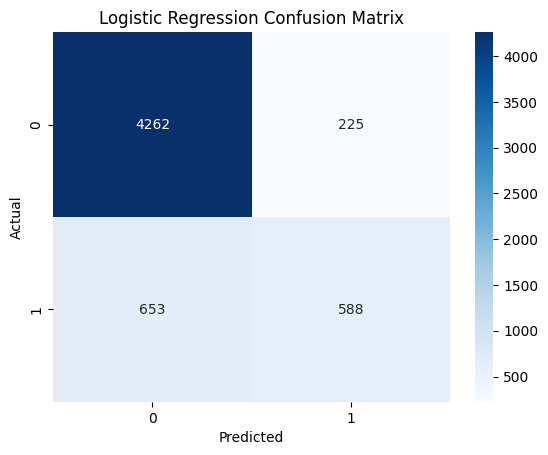

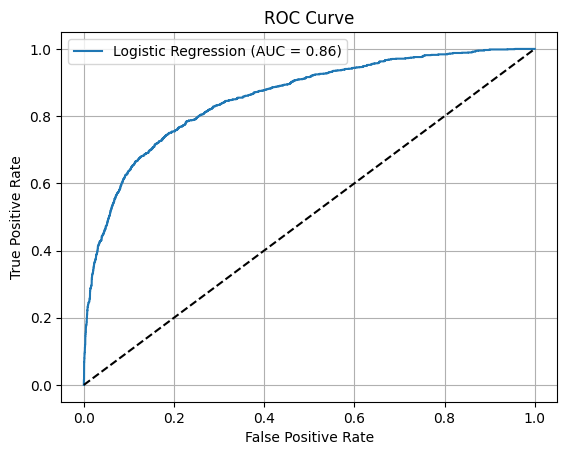

 Random Forest Evaluation
Accuracy: 0.9308659217877095
ROC-AUC: 0.9299537907612772
              precision    recall  f1-score   support

           0       0.92      0.99      0.96      4487
           1       0.97      0.70      0.81      1241

    accuracy                           0.93      5728
   macro avg       0.95      0.85      0.89      5728
weighted avg       0.93      0.93      0.93      5728



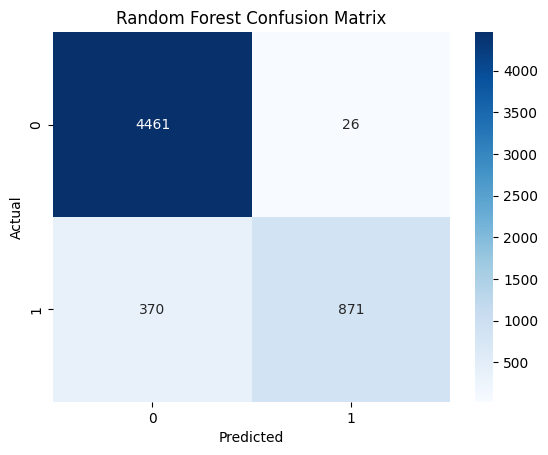

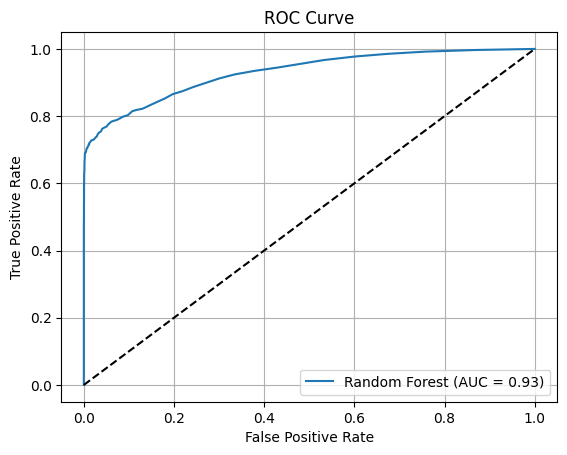

 XGBoost Evaluation
Accuracy: 0.9333100558659218
ROC-AUC: 0.9420366868778586
              precision    recall  f1-score   support

           0       0.93      0.99      0.96      4487
           1       0.95      0.73      0.83      1241

    accuracy                           0.93      5728
   macro avg       0.94      0.86      0.89      5728
weighted avg       0.93      0.93      0.93      5728



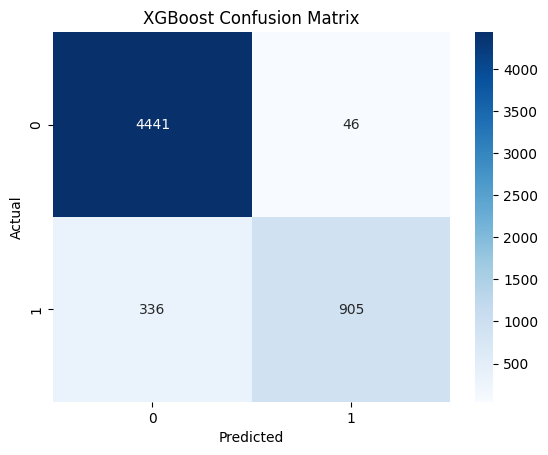

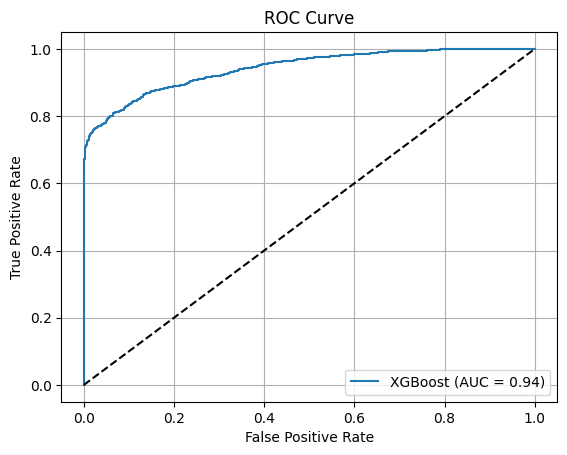

In [9]:
evaluate_model("Logistic Regression", lr, X_test, y_test)
evaluate_model("Random Forest", rf, X_test, y_test)
evaluate_model("XGBoost", xgb, X_test, y_test)


In [11]:
import joblib
joblib.dump(xgb, r"C:\Users\theow\Documents\Project\Explainable-Loan-Default\models\best_model_xgboost.pkl")


['C:\\Users\\theow\\Documents\\Project\\Explainable-Loan-Default\\models\\best_model_xgboost.pkl']